In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\praya\Downloads\election_results_2024.csv")

In [6]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [8]:
data.shape

(543, 8)

# party with highest and lowest margin of victory

In [10]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin']=pd.to_numeric(data['Margin'],errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin=data.loc[data['Margin'].idxmax()]

# number of seat won by each party

C:\Users\praya\AppData\Local\Temp\ipykernel_6772\735065258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


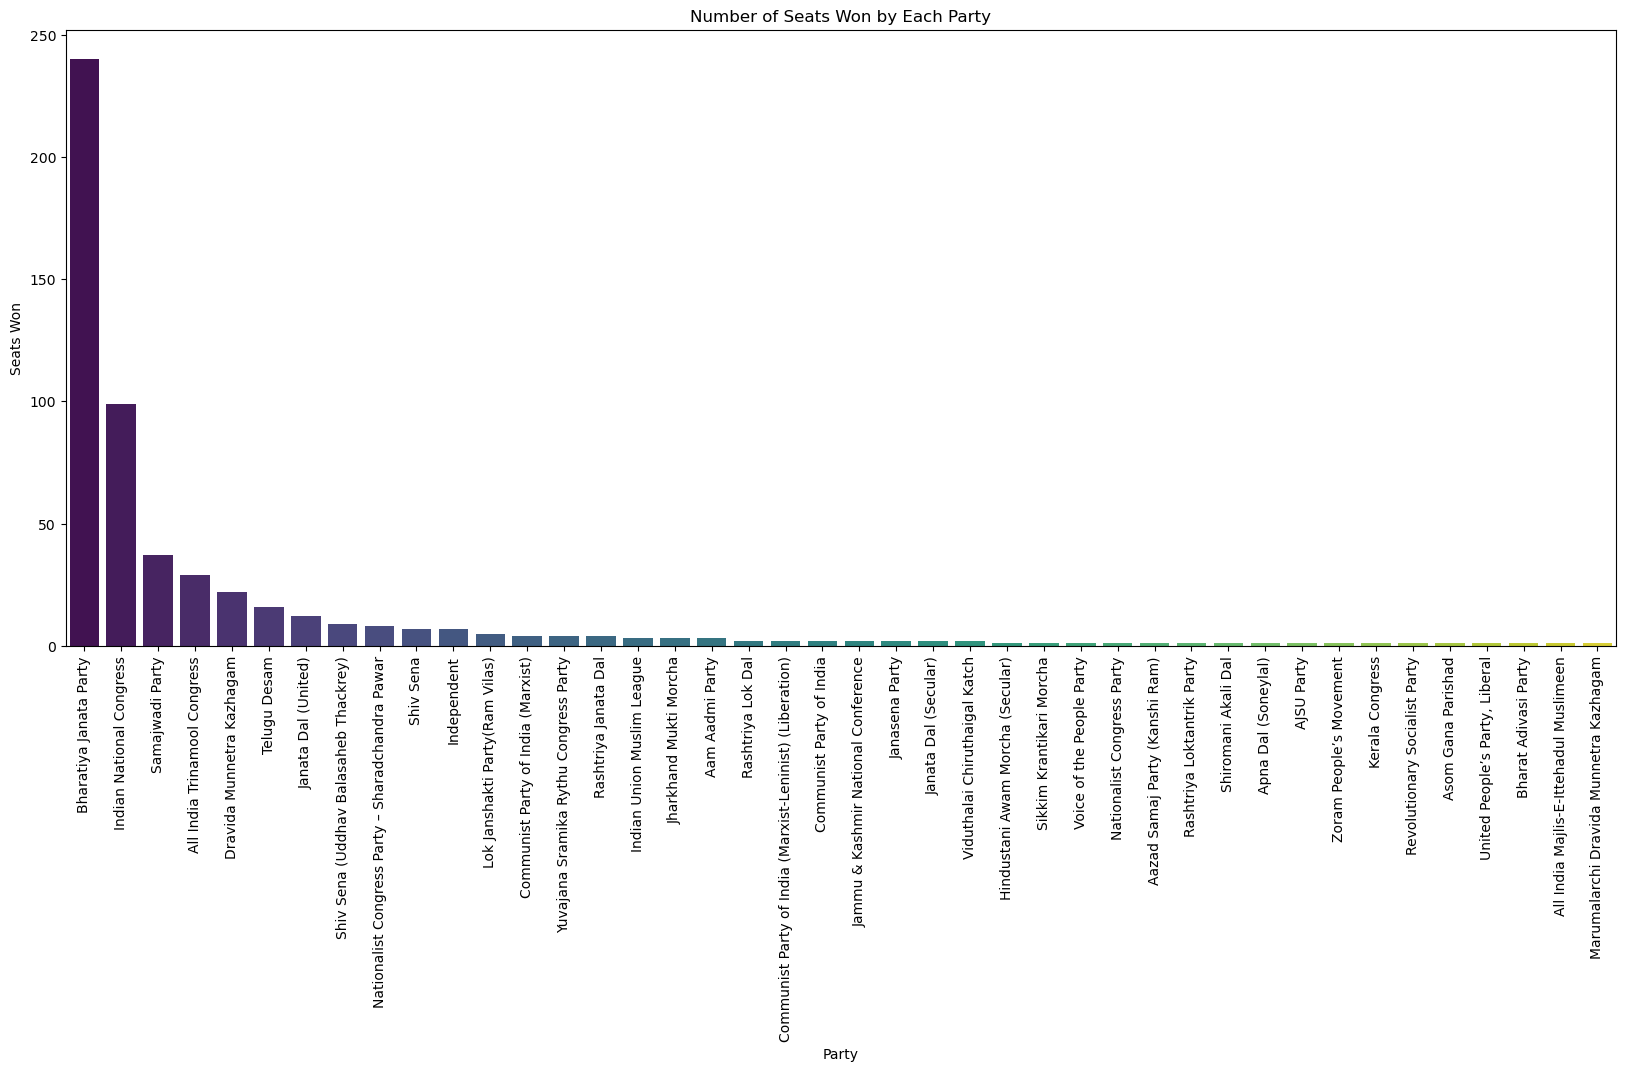

In [18]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()


# get the votes for rahul gandhi,amit shah and narendra modi

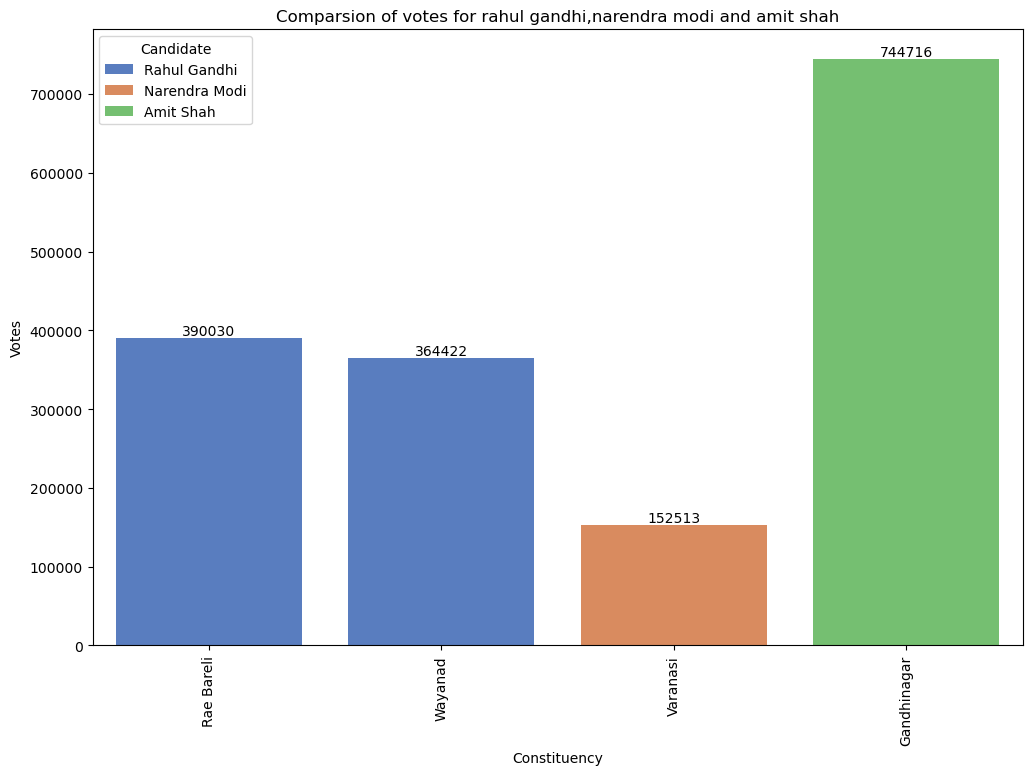

In [26]:
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries=data[data['Leading Candidate']=='NARENDRA MODI']
amit_entries=data[data['Leading Candidate']=='AMIT SHAH']

#get the votes for rahul gandhi,narendra modi, and amit shah
rahul_votes=rahul_entries['Margin'].values
modi_votes=modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes=amit_entries['Margin'].values[0] if not amit_entries.empty else 0

#get the original constituency names for rahul gandhi
rahul_constituencies=list(rahul_entries['Constituency'])

#get the original constituency names for narendra modi
modi_constituencies=modi_entries['Constituency'].values[0] if not modi_entries.empty else "Mo"

#get the original constituency names for amit shah
amit_constituencies=amit_entries['Constituency'].values[0] if not amit_entries.empty else "Am"

#combine the data
data_to_plot=pd.DataFrame({
  'Candidate': ['Rahul Gandhi']* len(rahul_votes) + ['Narendra Modi','Amit Shah'],
    'Constituency':rahul_constituencies+ [modi_constituencies,amit_constituencies],
    'Votes':list(rahul_votes)+[modi_votes,amit_votes]
})

plt.figure(figsize=(12,8))
ax=sns.barplot(data=data_to_plot,x='Constituency',y='Votes',hue='Candidate',palette='muted')
plt.title('Comparsion of votes for rahul gandhi,narendra modi and amit shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [30]:
akhilesh_entries = data[data['Leading Candidate'] == 'AKHILESH YADAV']
nitin_entries=data[data['Leading Candidate']=='NITIN JAIRAM GADKARI']
sambit_entries=data[data['Leading Candidate']=='SAMBIT PATRA']

#get the votes for rahul gandhi,narendra modi, and amit shah
akhilesh_votes=rahul_entries['Margin'].values
nitin_votes=modi_entries['Margin'].values[0] if not modi_entries.empty else 0
sambit_votes=amit_entries['Margin'].values[0] if not amit_entries.empty else 0

#get the original constituency names for rahul gandhi
akhilesh_constituencies=list(akhilesh_entries ['Constituency'])

#get the original constituency names for narendra modi
nitin_constituencies=nitin_entries['Constituency'].values[0] if not nitin_entries.empty else "Ni"

#get the original constituency names for amit shah
sambit_constituencies=sambit_entries['Constituency'].values[0] if not sambit_entries.empty else "Sa"

#combine the data
data_to_plot=pd.DataFrame({
  'Candidate': ['AKHILESH YADAV']* len(akhilesh_votes) + ['NITIN JAIRAM GADKARI','SAMBIT PATRA'],
    'Constituency':akhilesh_constituencies+ [nitin_constituencies,sambit_constituencies],
    'Votes':list(akhilesh_votes)+[nitin_votes,sambit_votes]
})

plt.figure(figsize=(12,8))
ax=sns.barplot(data=data_to_plot,x='Constituency',y='Votes',hue='Candidate',palette='muted')
plt.title('Comparsion of votes for rahul gandhi,narendra modi and amit shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

ValueError: All arrays must be of the same length

# highest and lowest victory candidate

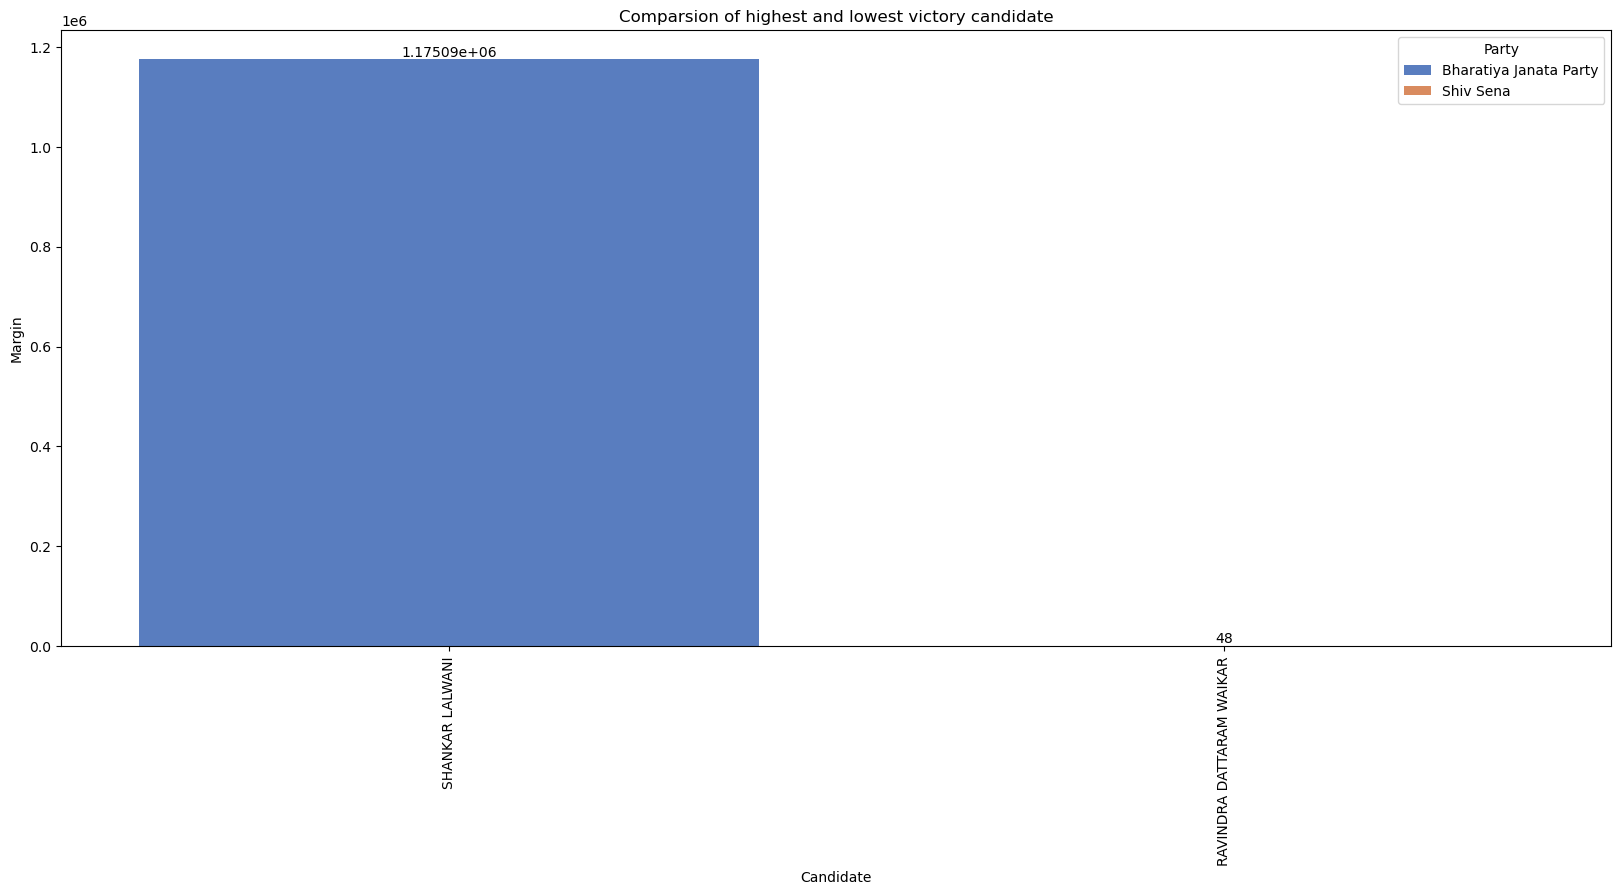

In [35]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

# combine the data
data_to_plot=pd.DataFrame({
    'Candidate':[highest_margin_entry['Leading Candidate'],lowest_margin_entry['Leading Candidate']],
    'Party':[highest_margin_entry['Leading Party'],lowest_margin_entry['Leading Party']],
    'Margin':[highest_margin_entry['Margin'],lowest_margin_entry['Margin']]
})

plt.figure(figsize=(20,8))
ax=sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='Party',palette='muted')
plt.title('Comparsion of highest and lowest victory candidate')
plt.xlabel('Candidate')
plt.ylabel('Margin')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

# histrogram of margin of victory

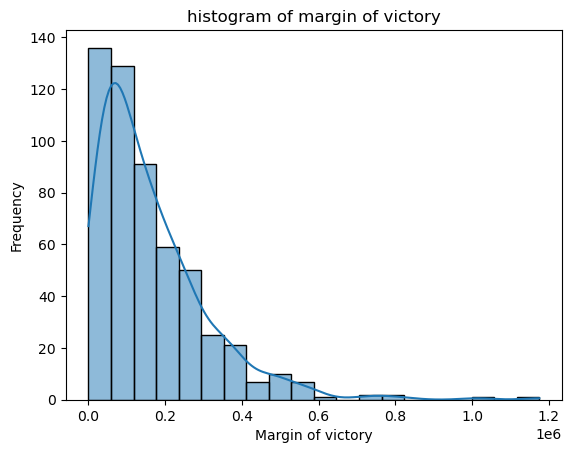

In [38]:
sns.histplot(data['Margin'],bins=20,kde=True)
plt.title('histogram of margin of victory')
plt.xlabel('Margin of victory')
plt.ylabel('Frequency')
plt.show()


# vote distribution by party

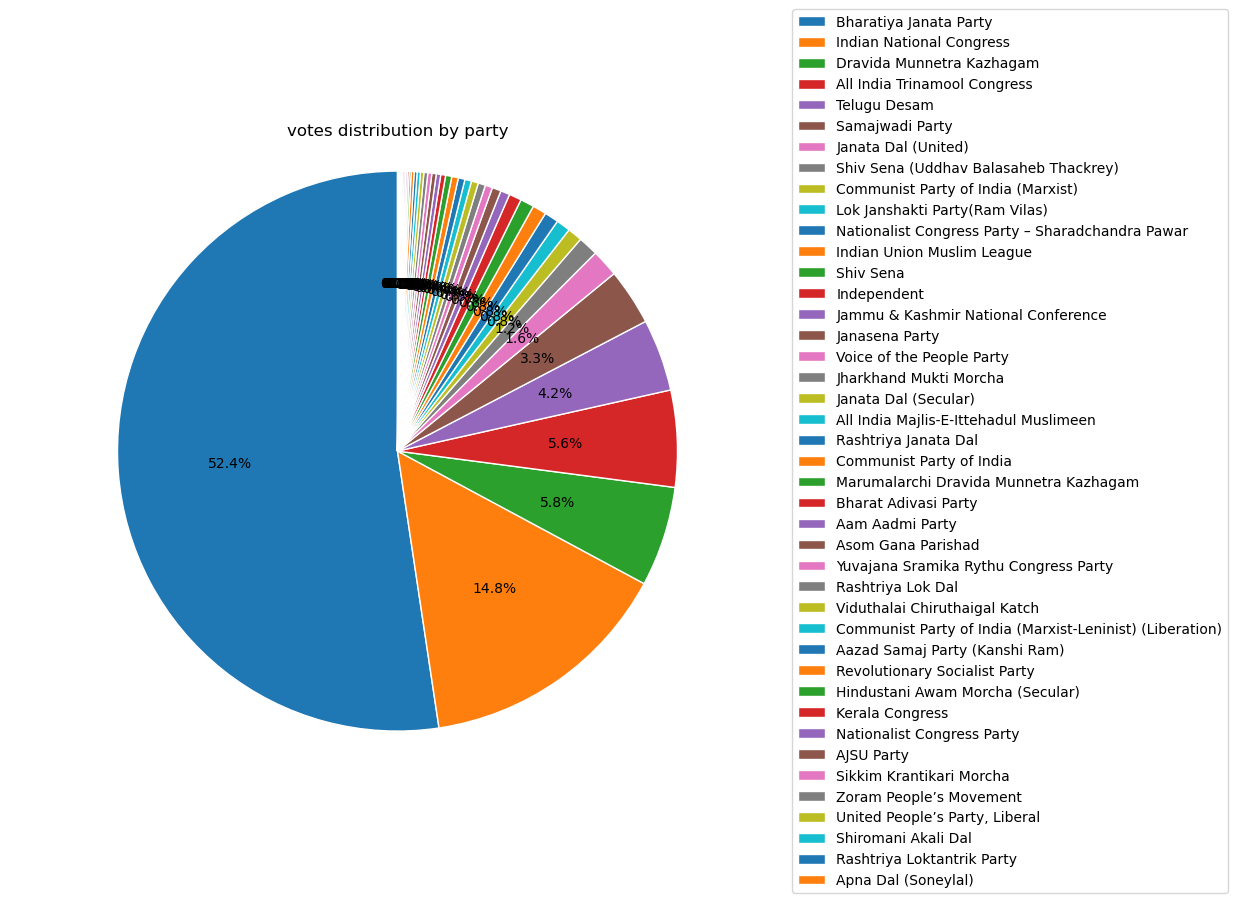

In [55]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

#plot pie chart
plt.figure(figsize=(10,8)) 
# wedgeprops=customize he property of each wedge in pie chart like lineswidth,edgecolor and facecolor
wedges,texts,autotexts=plt.pie(party_votes,labels=None,autopct='%1.1f%%',startangle=90,wedgeprops=dict(edgecolor='w'))
plt.title('votes distribution by party')
plt.axis('equal')
plt.legend(labels=party_votes.index,loc='center left',bbox_to_anchor=(1,0.5),fontsize='medium')
plt.show()


# votes distribution by top 10 trailing party

C:\Users\praya\AppData\Local\Temp\ipykernel_6772\2550745113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

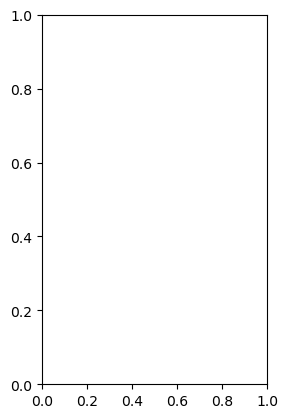

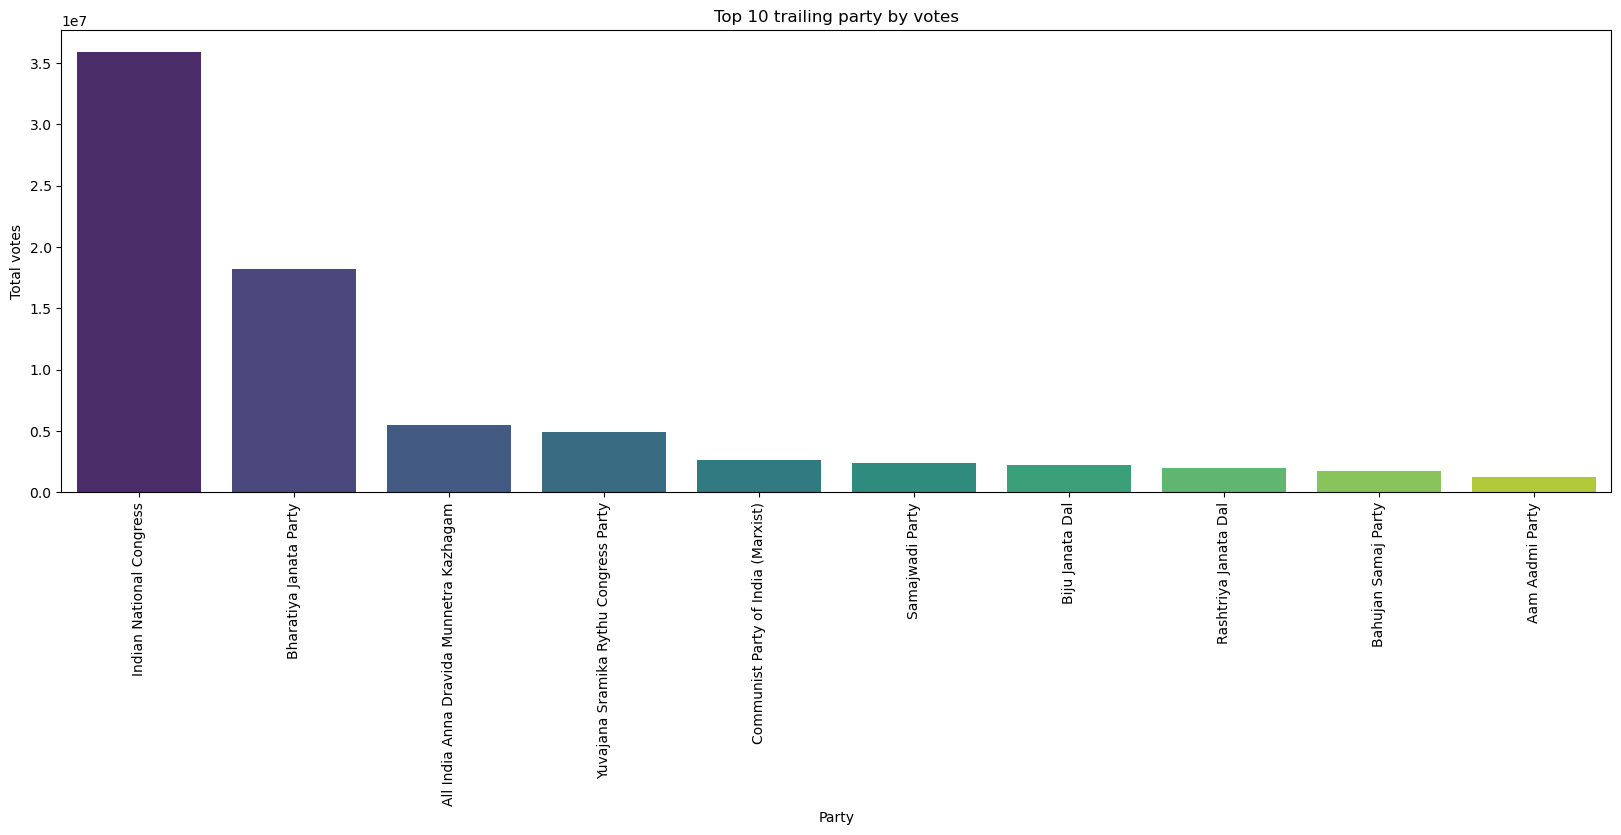

In [66]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=data['Trailing Party'].value_counts()

plt.subplot(1,2,1)
plt.figure(figsize=(20,6))
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title('Top 10 trailing party by votes')
plt.xlabel('Party')
plt.ylabel('Total votes')
plt.xticks(rotation=90)


# Top 10 Trailing Party by Seats

C:\Users\praya\AppData\Local\Temp\ipykernel_6772\3299080274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Leading_party_seats.index[:10],y=Leading_party_seats.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Samajwadi Party'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Dravida Munnetra Kazhagam'),
  Text(5, 0, 'Telugu Desam'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Nationalist Congress Party – Sharadchandra Pawar'),
  Text(9, 0, 'Shiv Sena')])

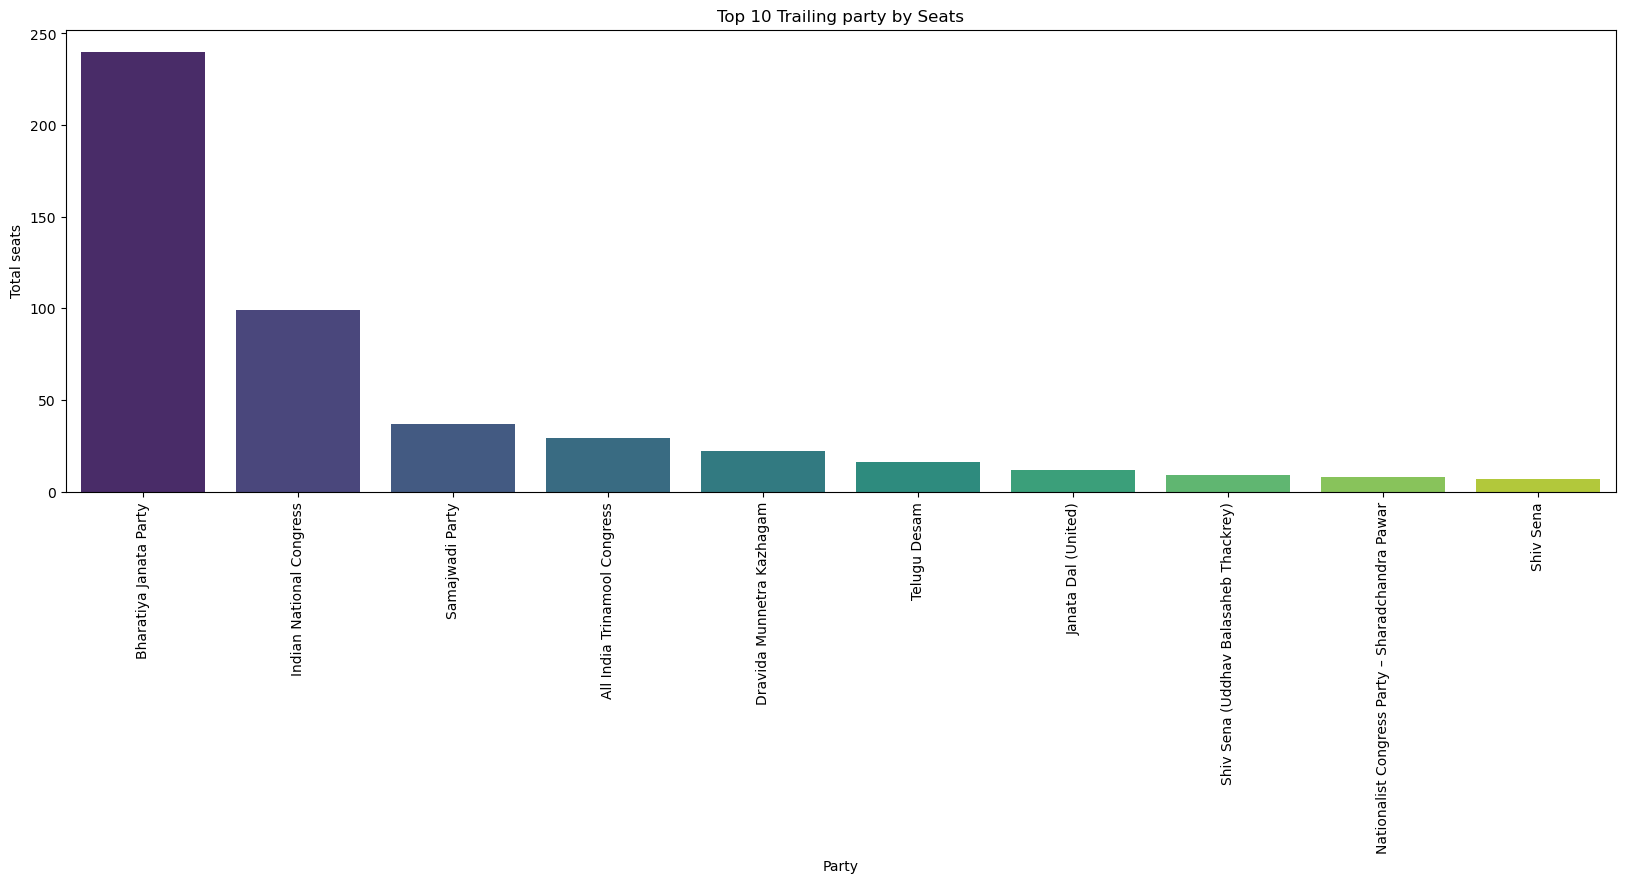

In [82]:
plt.figure(figsize=(20,6))
sns.barplot(x=Leading_party_seats.index[:10],y=Leading_party_seats.values[:10],palette='viridis')
plt.title('Top 10 Trailing party by Seats')
plt.xlabel('Party')
plt.ylabel('Total seats')
plt.xticks(rotation=90)


# votes distribution by top 10 leading party

C:\Users\praya\AppData\Local\Temp\ipykernel_6772\3465460824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Leading_party_votes.index[:10],y=Leading_party_votes.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Dravida Munnetra Kazhagam'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Communist Party of India (Marxist)'),
  Text(9, 0, 'Lok Janshakti Party(Ram Vilas)')])

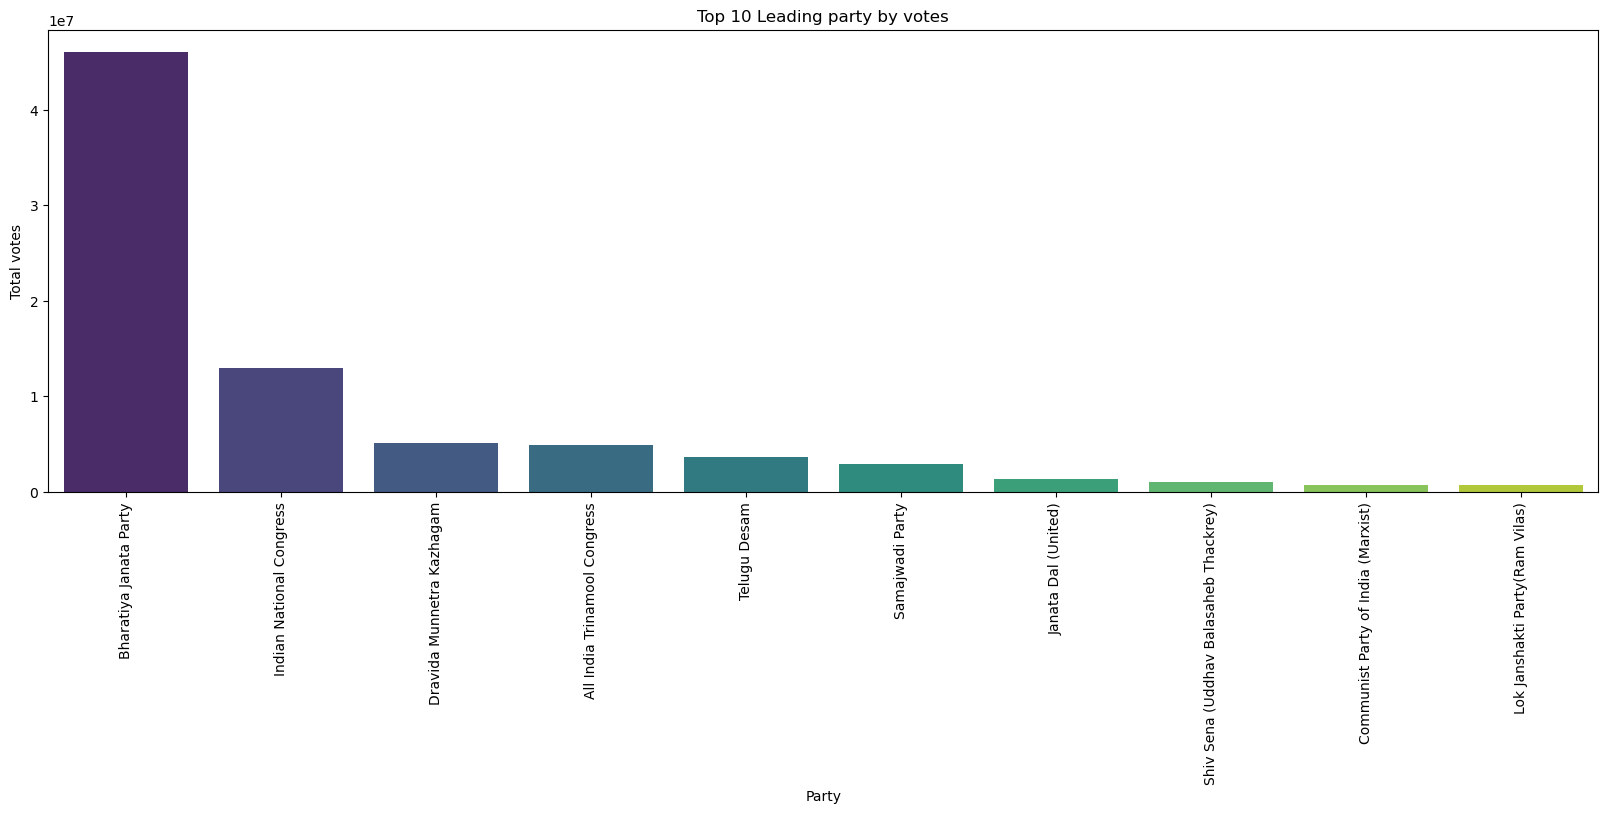

In [73]:
Leading_party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
Leading_party_seats=data['Leading Party'].value_counts()

#plt.subplot(1,2,1)
plt.figure(figsize=(20,6))
sns.barplot(x=Leading_party_votes.index[:10],y=Leading_party_votes.values[:10],palette='viridis')
plt.title('Top 10 Leading party by votes')
plt.xlabel('Party')
plt.ylabel('Total votes')
plt.xticks(rotation=90)
